# NLP Project - Analyzing AirBnB Reviews
Alp Akkaya, Almut Bohnhoff

In [1]:
import pandas as pd
import numpy as np
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

## Preprocessing 

In [2]:
# read reviews data 
reviews_cph = pd.read_csv("reviews_CPH.csv")
reviews_cph.info

<bound method DataFrame.info of         listing_id         id        date  reviewer_id     reviewer_name  \
0             6983       8985  2009-09-04        31133              Jeff   
1             6983       9199  2009-09-07        11472            Andrea   
2             6983      11763  2009-09-28        35317           Jeanine   
3             6983      20616  2009-12-17        53151             Sonja   
4             6983      23168  2010-01-04        50856             James   
...            ...        ...         ...          ...               ...   
184689    48541823  741896445  2021-03-24     44138822  Artan Abdirashid   
184690    48541823  742319567  2021-03-26    118714088               Leo   
184691    48547959  740869416  2021-03-21    392067604            Oliver   
184692    48764904  742982275  2021-03-28     31550977             Maria   
184693    48803674  742590334  2021-03-27    145161349          Benjamin   

                                                 commen

In [3]:
reviews_cph.date.sort_values()

0         2009-09-04
1         2009-09-07
2         2009-09-28
3         2009-12-17
4         2010-01-04
             ...    
170104    2021-03-28
166806    2021-03-28
2787      2021-03-30
147159    2021-03-30
172577    2021-03-30
Name: date, Length: 184694, dtype: object

In [4]:
print(len(reviews_cph))
# filter out non-english reviews
def detect_language(text):
    try: 
        return detect(text)
    except: 
        return np.nan
    
reviews_cph['lang'] = reviews_cph['comments'].apply(lambda x: detect_language(x))
reviews_cph_eng = reviews_cph[reviews_cph['lang']=='en']
reviews_cph_eng.reset_index(inplace = True)
print(len(reviews_cph))

184694


## Exploratory Data Analysis

In [5]:
# get english reviews 
reviews_cph = reviews_cph_eng

# convert listing_id in integer
reviews_cph.listing_id = reviews_cph.listing_id.apply(lambda x: int(x))

In [6]:
reviews_cph.info

# number of reviews 
len(reviews_cph)

# number of listings 
len(reviews_cph.listing_id.unique())

7183

In [7]:
# which listings have the most reviews? 

def find_top_listings(data, n): 
    # create empty dataframe 
    top_listings = pd.DataFrame(columns = ['Listing_ID', 'Number of Reviews'])
    # get all listings 
    listing_ids = list(data['listing_id'].unique())
    # calculate the number of reviews per listing 
    temp = data.groupby('listing_id')['comments'].count()
    temp = pd.DataFrame(temp)
    temp.reset_index(inplace = True)
    temp.rename(columns = {'listing_id': 'Listing_ID', 'comments': 'Number of Reviews'},inplace=True)
    # sort data frame in descending order
    temp.sort_values(by=['Number of Reviews'], inplace=True, ascending=False)
    
    # return a dataframe with n reviews 
    result = temp.head(n)
    return result

# get top listings 
top_3 = find_top_listings(reviews_cph, n = 3)
top_5 = find_top_listings(reviews_cph, n = 5)
top_10 = find_top_listings(reviews_cph, n = 10)


In [8]:
desc = reviews_cph.groupby('listing_id')['comments'].count().describe()
desc

count    7183.000000
mean       20.371293
std        32.195918
min         1.000000
25%         4.000000
50%        10.000000
75%        24.000000
max       567.000000
Name: comments, dtype: float64

<AxesSubplot:xlabel='Listing_ID', ylabel='Number of Reviews'>

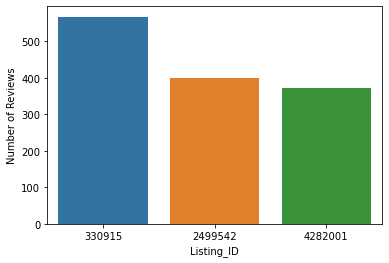

In [9]:
# plot top 3 
sns.barplot(x = 'Listing_ID', y = 'Number of Reviews', data = top_3)


<AxesSubplot:xlabel='Listing_ID', ylabel='Number of Reviews'>

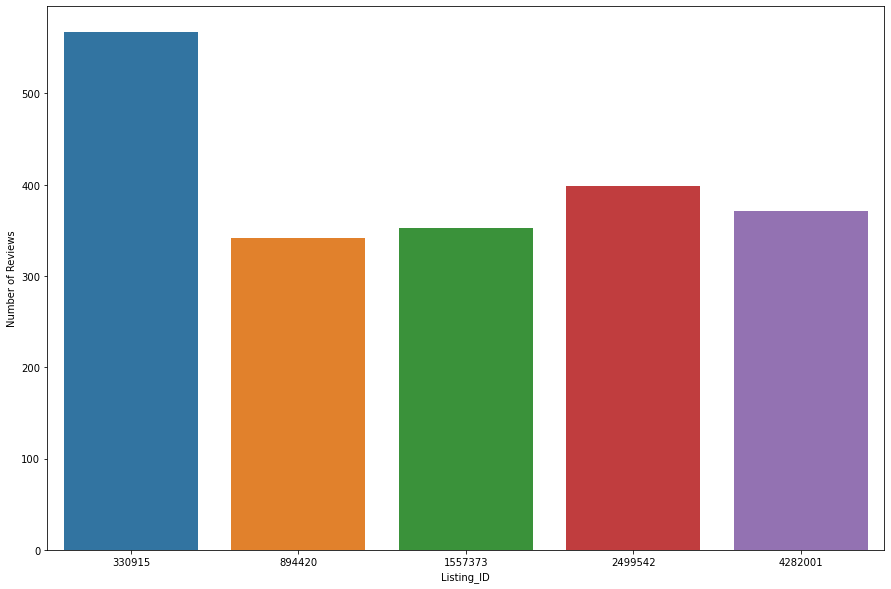

In [10]:
# plot top 5
fig= plt.figure(figsize=(15,10))
sns.barplot(x = 'Listing_ID', y = 'Number of Reviews', data = top_5)


<AxesSubplot:xlabel='Listing_ID', ylabel='Number of Reviews'>

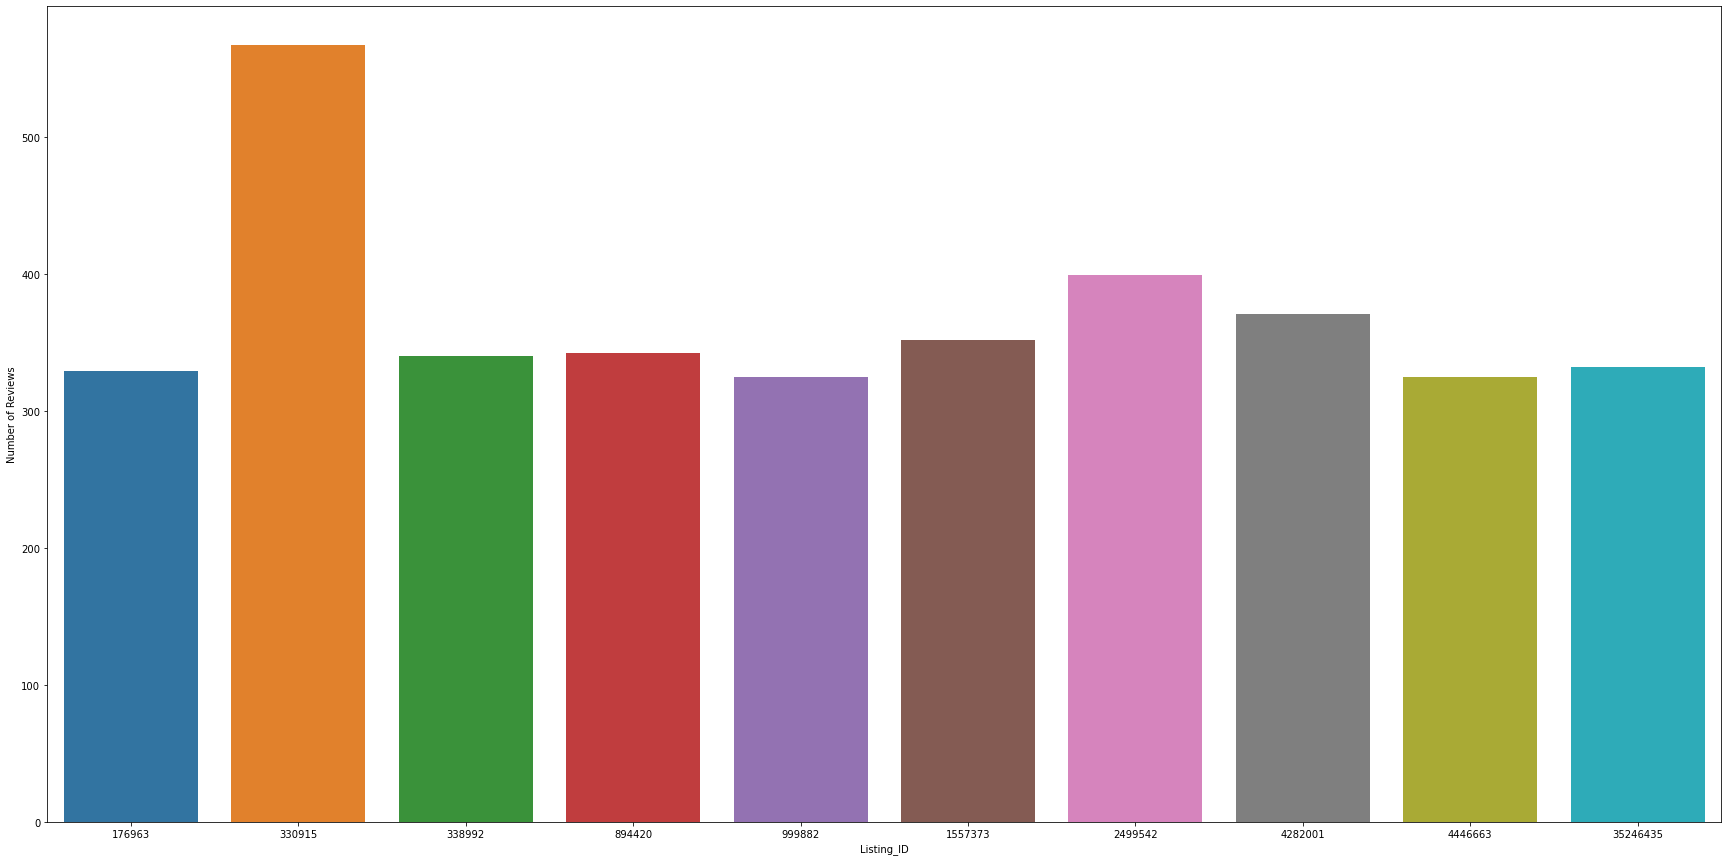

In [11]:
# plot top 10 
fig= plt.figure(figsize=(30,15))
sns.barplot(x = 'Listing_ID', y = 'Number of Reviews', data = top_10)


count    146327.000000
mean         49.629050
std          44.083056
min           1.000000
25%          20.000000
50%          39.000000
75%          65.000000
max        1000.000000
Name: comments, dtype: float64


<AxesSubplot:>

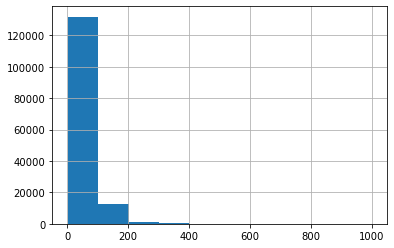

In [12]:
# plot distribution of length of reviews 
lens = reviews_cph.comments.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [13]:
len(reviews_cph.comments[56].split())

42

In [14]:
# find the most common words

# most common words 
stops = set(stopwords.words('english'))
cv = CountVectorizer(stop_words=stops)
counts = cv.fit_transform(reviews_cph.comments)
most_common = pd.DataFrame(counts.sum(axis=0),columns=cv.get_feature_names()).T.sort_values(0,ascending=False).head(50)
most_common 

# find the most common bi-grams 
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(reviews_cph.comments)
common_bigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)
common_bigrams

,0
great location,13252
highly recommend,10448
great host,8524
would definitely,8514
city center,7839
walking distance,7646
place stay,6818
definitely recommend,6095
stay copenhagen,5620
great place,5517


In [15]:
# visualise most common words 
def create_wordcloud(text, wordcloud_file_name, max_words): 
    cloud = WordCloud(background_color = "white", max_words = max_words, stopwords = set(STOPWORDS))
    cloud.generate(text)
    cloud.to_file(wordcloud_file_name)

#text = reviews_cph.comments.apply(lambda x: x.lower())
text = ' '.join(reviews_cph.comments)
create_wordcloud(text, wordcloud_file_name="wordcloud.png", max_words=100)

# output see files on the left

## Topic Modelling

**The Data**

We will use the data of Copenhagen listing reviews of Airbnb downloaded from [Insideairbnb.com](http://insideairbnb.com/get-the-data.html).

In [16]:
#necessary packages are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2018)
from gensim.models import CoherenceModel
import nltk
nltk.download('wordnet')

C:\Users\Lenovo\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
#the comments column is labeled
data_text = reviews_cph[['comments']]
documents = data_text

In [18]:
len(documents)

146327

In [19]:
#a small overview on how the data looks
documents[:5]

,comments
0,"Convenient location, clean apartment, great br..."
1,We really enjoyed staying to Simon in our firs...
2,"Friendly host, save neighbourhood, clean appar..."
3,"Simon is great! Fantastic place to stay, supe..."
4,"Great bed, clean apartment, comfy bed, accomod..."


In [20]:
#missing comments are dropped
documents = documents.dropna()
#we have spotted around 4000 rows that had an automated message caused by cancelled reservation. These comments are removed.
documents = documents[~documents.comments.str.contains("The host canceled this reservation")]

In [21]:
#data length after dropping irrelevant rows
len(documents)

142140

In [22]:
#an overview of how a comment looks
documents['comments'][0]

"Convenient location, clean apartment, great breakfast...couldn't have asked for more. Best value in lodging in all of Copenhagen. "

**Data Preprocessing**

We will perform the following steps:

Tokenization: Split the text into sentences and the sentences into words. 

Lowercase the words and remove punctuation.

Words that have fewer than 3 characters are removed.

All stopwords are removed.

Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.


In [23]:
#install the package paramiko
#!pip install --upgrade pip
#!pip install --no-use-pep517 bcrypt
#!pip install paramiko

Write a function to perform lemmatize and stem preprocessing steps on the data set.

In [24]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

Select a document to preview after preprocessing.

In [25]:
doc_sample = documents.values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Convenient', 'location,', 'clean', 'apartment,', 'great', "breakfast...couldn't", 'have', 'asked', 'for', 'more.', 'Best', 'value', 'in', 'lodging', 'in', 'all', 'of', 'Copenhagen.', '']


 tokenized and lemmatized document: 
['conveni', 'locat', 'clean', 'apart', 'great', 'breakfast', 'couldn', 'ask', 'best', 'valu', 'lodg', 'copenhagen']


Preprocess the comments text, saving the results as ‘processed_docs’

In [26]:
processed_docs = documents['comments'].map(preprocess)

In [27]:
len(processed_docs)

142140

**Bag of Words on the Data set**

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [28]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [29]:
print(len(dictionary.iteritems()))

25813


In [30]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 apart
1 ask
2 best
3 breakfast
4 clean
5 conveni
6 copenhagen
7 couldn
8 great
9 locat
10 lodg


**Gensim filter_extremes**

Filter out tokens that appear in

less than 5 documents (absolute number) or

more than 0.5 documents (fraction of total corpus size, not absolute number).

In [31]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
print(len(dictionary.iteritems()))

7034


**Gensim doc2bow**

For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [32]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print(bow_corpus[25])
print('length of corpus: ', len(bow_corpus))

[(9, 1), (15, 1), (19, 1), (37, 3), (48, 2), (61, 1), (69, 1), (70, 1), (75, 1), (84, 1), (98, 1), (101, 1), (102, 1), (156, 1), (164, 1), (168, 1), (195, 1), (196, 1), (197, 1), (198, 1), (199, 1)]
length of corpus:  142140


Preview Bag Of Words for our sample preprocessed document.

In [33]:
bow_doc_25 = bow_corpus[25]

for i in range(len(bow_doc_25)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_25[i][0], 
                                                     dictionary[bow_doc_25[i][0]], 
                                                     bow_doc_25[i][1]))

Word 9 ("locat") appears 1 time.
Word 15 ("host") appears 1 time.
Word 19 ("simon") appears 1 time.
Word 37 ("like") appears 3 time.
Word 48 ("amaz") appears 2 time.
Word 61 ("nice") appears 1 time.
Word 69 ("coffe") appears 1 time.
Word 70 ("come") appears 1 time.
Word 75 ("night") appears 1 time.
Word 84 ("equip") appears 1 time.
Word 98 ("weekend") appears 1 time.
Word 101 ("felt") appears 1 time.
Word 102 ("home") appears 1 time.
Word 156 ("walk") appears 1 time.
Word 164 ("thing") appears 1 time.
Word 168 ("center") appears 1 time.
Word 195 ("fresh") appears 1 time.
Word 196 ("hous") appears 1 time.
Word 197 ("short") appears 1 time.
Word 198 ("thank") appears 1 time.
Word 199 ("wonderful") appears 1 time.


### LDA using Bag of Words

Before training the model, we look at the coherence score in order to pick the optimal number of topics

In [34]:
coherences=[]
for i in range(1,100,10):
    cm = CoherenceModel(model=gensim.models.LdaMulticore(bow_corpus, num_topics=i, 
                                       id2word=dictionary, passes=2, 
                                      workers=4), corpus=bow_corpus, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    coherences.append(coherence)

Text(0, 0.5, 'Coherence Score')

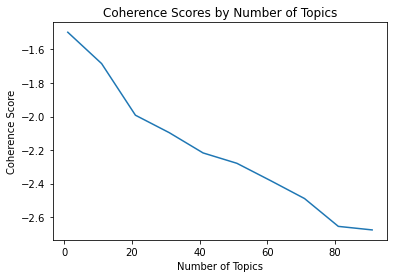

In [35]:
plt.plot(range(1,100,10),coherences)
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

In [36]:
coherences_low=[]
for i in range(1,10):
    cm = CoherenceModel(model=gensim.models.LdaMulticore(bow_corpus, num_topics=i, 
                                       id2word=dictionary, passes=2, 
                                      workers=4), corpus=bow_corpus, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    coherences_low.append(coherence)

Text(0, 0.5, 'Coherence Score')

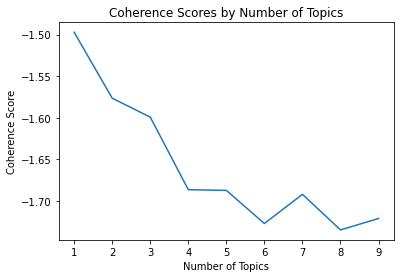

In [37]:
plt.plot(range(1,10),coherences_low)
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

In [39]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=7, 
                                       id2word=dictionary, passes=2, 
                                      workers=4)

In [40]:
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))


Perplexity:  -6.282677945148278


Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [41]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx+1, topic))

Topic: 1 
Words: 0.031*"stay" + 0.028*"nice" + 0.028*"locat" + 0.027*"flat" + 0.027*"apart" + 0.026*"great" + 0.023*"perfect" + 0.018*"place" + 0.018*"time" + 0.018*"copenhagen"
Topic: 2 
Words: 0.027*"locat" + 0.026*"room" + 0.026*"place" + 0.023*"stay" + 0.021*"apart" + 0.018*"copenhagen" + 0.018*"great" + 0.016*"clean" + 0.015*"perfect" + 0.013*"bathroom"
Topic: 3 
Words: 0.018*"apart" + 0.013*"locat" + 0.010*"stay" + 0.010*"walk" + 0.010*"bathroom" + 0.010*"room" + 0.010*"floor" + 0.009*"great" + 0.009*"kitchen" + 0.008*"place"
Topic: 4 
Words: 0.035*"hous" + 0.028*"stay" + 0.021*"place" + 0.020*"citi" + 0.018*"apart" + 0.015*"copenhagen" + 0.015*"minut" + 0.014*"perfect" + 0.014*"walk" + 0.014*"famili"
Topic: 5 
Words: 0.055*"nice" + 0.053*"great" + 0.046*"locat" + 0.041*"apart" + 0.036*"host" + 0.033*"place" + 0.031*"good" + 0.027*"clean" + 0.022*"close" + 0.020*"citi"
Topic: 6 
Words: 0.053*"apart" + 0.038*"great" + 0.029*"locat" + 0.027*"stay" + 0.024*"place" + 0.023*"walk" + 0

# Visualization

There is a nice way to visualize the LDA model you built using the package pyLDAvis:

In [42]:
%matplotlib inline
import pyLDAvis
from pyLDAvis import gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

**Allocating topics to documents**

In [43]:
processed_docs[25]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['come',
 'short',
 'night',
 'weekend',
 'wonderful',
 'simon',
 'bager',
 'nice',
 'hous',
 'equip',
 'thank',
 'amaz',
 'fresh',
 'coffe',
 'locat',
 'amaz',
 'minuit',
 'walk',
 'center',
 'thing',
 'felt',
 'like',
 'home',
 'like',
 'like',
 'host']

In [44]:
for index, score in sorted(lda_model[bow_corpus[25]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 7)))


Score: 0.4459863603115082	 
Topic: 0.031*"stay" + 0.028*"nice" + 0.028*"locat" + 0.027*"flat" + 0.027*"apart" + 0.026*"great" + 0.023*"perfect"

Score: 0.4021162986755371	 
Topic: 0.050*"stay" + 0.041*"place" + 0.027*"recommend" + 0.026*"copenhagen" + 0.025*"great" + 0.021*"love" + 0.019*"host"

Score: 0.12894658744335175	 
Topic: 0.035*"hous" + 0.028*"stay" + 0.021*"place" + 0.020*"citi" + 0.018*"apart" + 0.015*"copenhagen" + 0.015*"minut"


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Testing model on unseen document

In [45]:
unseen_document = 'love this apartment. near to metro.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

print('bow_vector: ', bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

bow_vector:  [(0, 1), (16, 1), (236, 1), (237, 1)]
Score: 0.8271917700767517	 Topic: 0.055*"nice" + 0.053*"great" + 0.046*"locat" + 0.041*"apart" + 0.036*"host"
Score: 0.02894064597785473	 Topic: 0.050*"stay" + 0.041*"place" + 0.027*"recommend" + 0.026*"copenhagen" + 0.025*"great"
Score: 0.028873702511191368	 Topic: 0.053*"apart" + 0.038*"great" + 0.029*"locat" + 0.027*"stay" + 0.024*"place"
Score: 0.02884589321911335	 Topic: 0.035*"hous" + 0.028*"stay" + 0.021*"place" + 0.020*"citi" + 0.018*"apart"
Score: 0.028814278542995453	 Topic: 0.031*"stay" + 0.028*"nice" + 0.028*"locat" + 0.027*"flat" + 0.027*"apart"
Score: 0.028684895485639572	 Topic: 0.018*"apart" + 0.013*"locat" + 0.010*"stay" + 0.010*"walk" + 0.010*"bathroom"
Score: 0.028648845851421356	 Topic: 0.027*"locat" + 0.026*"room" + 0.026*"place" + 0.023*"stay" + 0.021*"apart"


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Our test document has the highest probability to be part of the topic on the top.

### LDA with TF-IDF

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.



In [46]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
corpus_tfidf = tfidf[bow_corpus]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, passes=2, workers=4)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
cm = CoherenceModel(model=lda_model_tfidf, corpus=corpus_tfidf, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value
coherence

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-1.7713008371175007

In [50]:
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus_tfidf))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.73419644445753


In [51]:
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model_tfidf, corpus=corpus_tfidf, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Word Vectors

In [52]:
# !pip install gensim # only uncomment if you don't have the gensim-package already
# Get the interactive Tools for Matplotlib
#%matplotlib notebook
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# print functionality for printing the objects.
from pprint import pprint as pprint
import os

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For looking at word vectors, I'll use Gensim. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Stanford offers GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(We use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [54]:

# unfortunately you have to specify the full path to the word vectors file 
# that is build from e.g. glove which is already build and available 
# on Glove page: http://nlp.stanford.edu/data/glove.6B.zip
# Download and put in folder with code

full_path = os.path.abspath(r'glove.6B.100d.txt')

glove_file = datapath(full_path)

# just specification of the temp file name (glove.6B.100d.word2vec.txt), 
# but it has no significance
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

glove2word2vec(glove_file, word2vec_glove_file)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  


(400000, 100)

In [55]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
len(model['cat'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100

In [58]:
class WordVecVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = 100
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in texts.split() if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for texts in X
        ])
#representing each comment by the mean of word embeddings for the words used in the comments.
wtv_vect = WordVecVectorizer(model)
X_train_wtv = wtv_vect.transform(documents.comments)
print(X_train_wtv.shape)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(142140, 100)


In [59]:
type(X_train_wtv)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numpy.ndarray

In [60]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_wtv)
    documents["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
elbow_curve = pd.DataFrame(sse, columns =["K", "SSE"])

elbow_curve = pd.DataFrame(list(zip(sse.keys(), list(sse.values()))), columns=["K", "SSE"])

#elbow_curve.plot()
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'SSE by Number of Clusters')

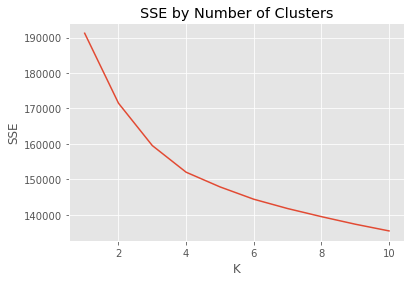

In [62]:
import seaborn as sns 
sns.lineplot(x="K", y="SSE", data= elbow_curve).set_title('SSE by Number of Clusters')

In [63]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_train_wtv)
df = pd.DataFrame({'comments' :documents.comments, 'topic_cluster' :y_km })

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Cluster No.')

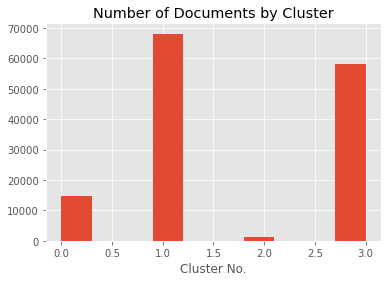

In [64]:
import matplotlib.pyplot as plt
plt.hist(df['topic_cluster'])
plt.title('Number of Documents by Cluster')
plt.xlabel('Cluster No.')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


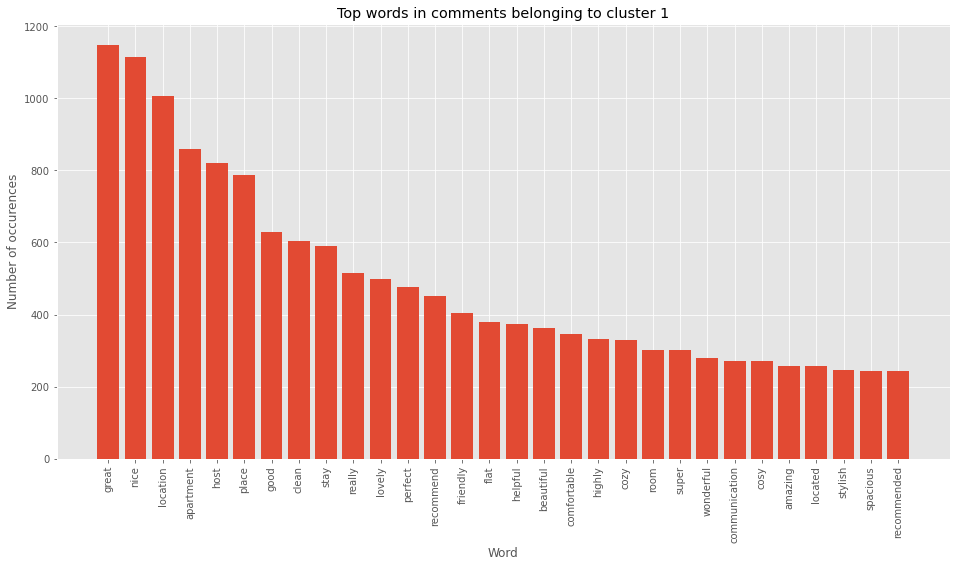

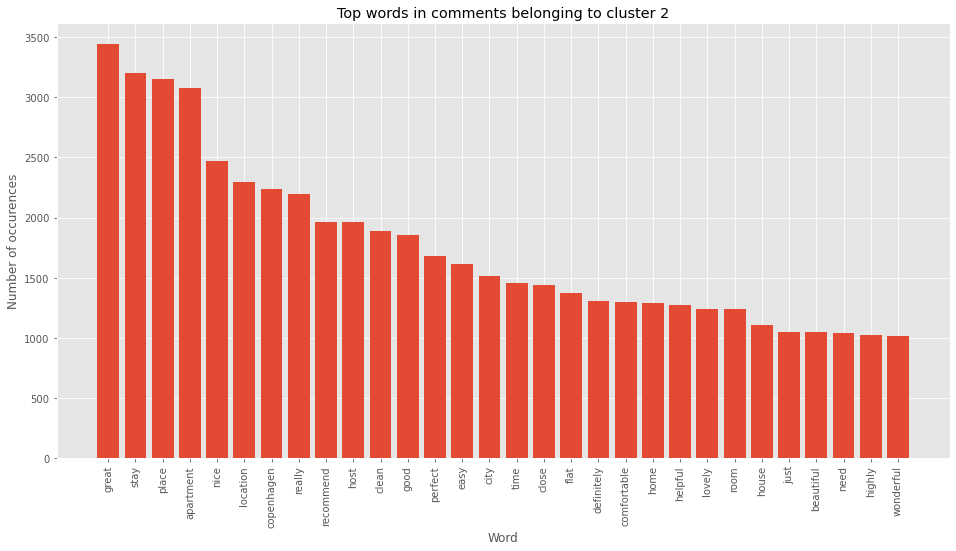

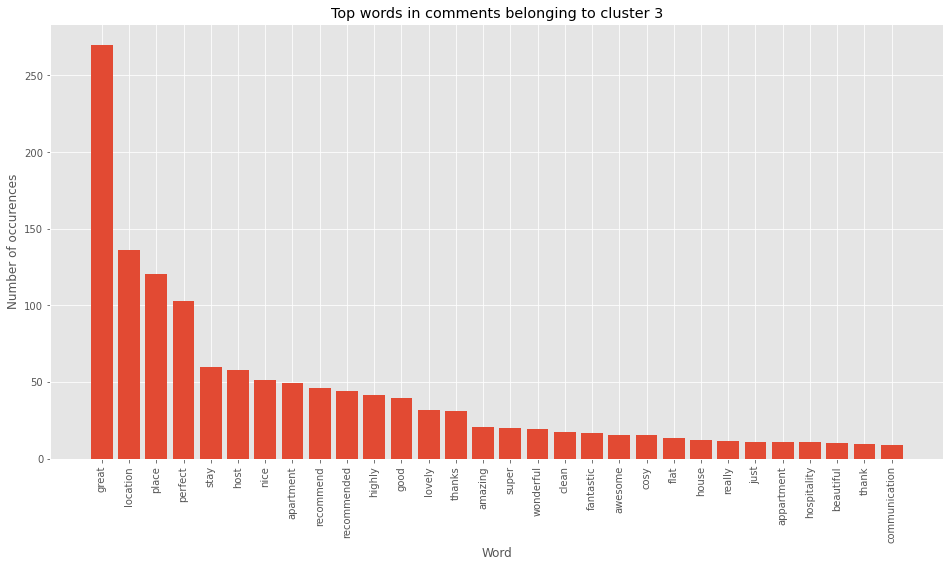

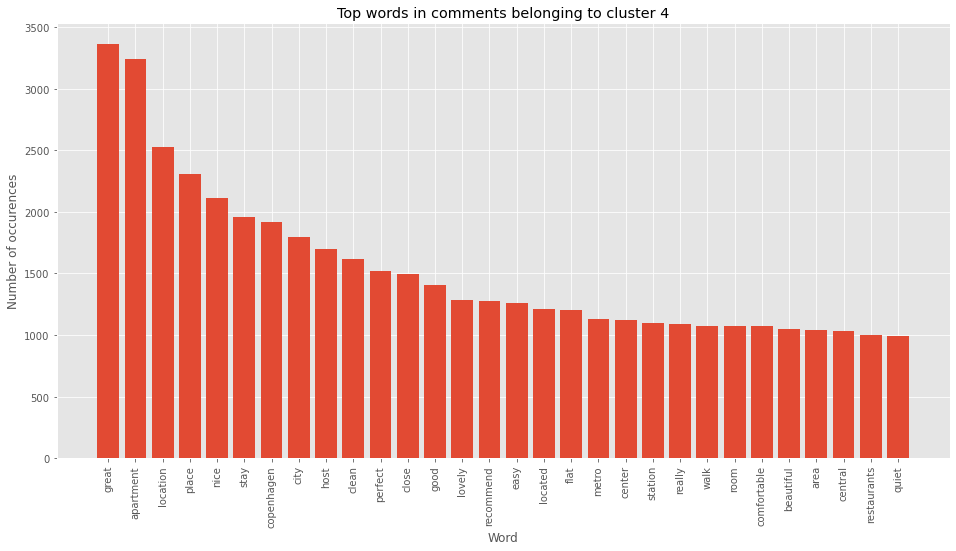

In [65]:
def get_top_n_words(corpus, n=10):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for i in range(4):
    words = []
    word_values = []
    for a,b in get_top_n_words(df[df['topic_cluster'] == i]['comments'],30):
        words.append(a)
        word_values.append(b)

    fig, ax = plt.subplots(figsize=(16,8))
    ax.bar(range(len(words)), word_values);
    ax.set_xticks(range(len(words)));
    ax.set_xticklabels(words, rotation='vertical');
    ax.set_title('Top words in comments belonging to cluster ' + str(i+1));
    ax.set_xlabel('Word');
    ax.set_ylabel('Number of occurences');
    plt.show()

## Text Summarization

### Pre-processing

In [66]:
# import packages
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')
nltk.download('punkt')
import scipy
from nltk.cluster.util import cosine_distance

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
# drop NAs
reviews_cph = reviews_cph.dropna()
# filter out the automatic comments 
reviews_cph = reviews_cph[~reviews_cph.comments.str.contains("The host canceled this reservation")]

# convert text to lower case 
def lower(text): 
    return text.lower()

# tokenize 
def tokenize(text): 
    return sent_tokenize(text)

# tokenize the sentences for each review 
reviews_cph['reviews'] = reviews_cph.comments.apply(lambda x: lower(x))
reviews_cph['reviews'] = reviews_cph.reviews.apply(lambda x: tokenize(x))
                                                   

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# join the reviews per listing
data = pd.DataFrame(columns = ['Listing ID', 'Reviews'])
listing_ids = list(reviews_cph['listing_id'].unique())
for listing_id in listing_ids: 
    reviews_list = []
    temp = reviews_cph[reviews_cph['listing_id']== listing_id]
    temp_list = list(temp.reviews)
    for item in temp_list: 
        reviews_list.extend(item)
    data = data.append({'Listing ID': listing_id, 'Reviews': reviews_list}, ignore_index = True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
type(temp.reviews)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.series.Series

In [70]:
data.Reviews[0]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


["convenient location, clean apartment, great breakfast...couldn't have asked for more.",
 'best value in lodging in all of copenhagen.',
 'we really enjoyed staying to simon in our first visit to copenhagen.',
 'his place his good located and very confortable.',
 'good host and lovely breakfast in the morning.',
 'friendly host, save neighbourhood, clean appartment and comfortable bed: i enjoyed it very much!',
 'simon is great!',
 'fantastic place to stay, super organized and friendly host and a comfortable bed, what more could you ask?',
 'great bed, clean apartment, comfy bed, accomodating host, great price.',
 "can't ask for more!",
 'great value, very clean and comfortable apartment.',
 'good breakfast in the morning.',
 'apartment is a pleasant 10-15 minute stroll into the heart of copenhagen.',
 'pleasant neighborhood with some great eateries nearby.',
 'the room is quiet and i slept like a baby.',
 'simon is a helpful, friendly host and  i can thoroughly recommend staying here

In [71]:
# create word clouds for top 3 listings 
top3_ids = top_3.Listing_ID.unique()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
# remove punctuation 
punctuation = list(string.punctuation)
def remove_punctuation(text_list,punct_list):
    new_text_list = []
    for item in text_list: 
        emptyString=""
        newString=re.sub(r'[^\w\s]',emptyString,item)
        new_text_list.append(newString)
    return new_text_list


# remove stop words 
stop_words = stopwords.words('english')
def remove_stop_words(text):
    filtered_sentence = [w for w in text if not w.lower() in stop_words]
    return filtered_sentence

# flatten
def flatten(text): 
    flattened = [sentence for review in text for sentence in review]
    return flattened 
  
data['Tokenized Reviews'] = data['Reviews'].apply(lambda x: remove_punctuation(x, punctuation))
data['Final Reviews'] = data['Tokenized Reviews'].apply(lambda x: remove_stop_words(x))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
data['Final Reviews'][58]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['erik and his family were kind and quiet hosts i would stay there again surely',
 'the room was basic but very clean',
 'the location itself was not pretty but it was central and was a great base from which to explore the city',
 'the shared kitchen and bathroom were not crowded but not super clean not dirty but dont expect it to be like a hotel room just expect it to be as if youre staying at a friends apartment',
 'overall a very positive experience with a good location good price good hosts',
 'plus copenhagen is a fantastic city',
 'this was my first airbnb experience and i have to say im pleasantly impressed',
 'my sister suggested me that i can book a nice room in central location at a very convenient price and this is what i did last minute booking in the centre of copenaghen',
 'mr erik was very kind in responding immediately about the availability of the room i got the one facing the lake as there is another one towards the end of the house next to the kitchen already occupie

In [75]:
# download pretrained GloVe word embeddings
! wget http://nlp.stanford.edu/data/glove.6B.zip

! unzip glove*.zip

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [76]:
# Extract word vectors
def extract_word_vector(vector_path):
    word_embeddings = {}
    with open(vector_path, "r", encoding='utf-8') as vector_file:
        for line in vector_file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            word_embeddings[word] = coefs
    return word_embeddings

dims = 100
word_embeddings = extract_word_vector(f"glove.6B.{dims}d.txt")

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
import itertools
import networkx as nx
import scipy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
def sentence_similarity(vector1, vector2):
    similarity_score = 1 - cosine_distance(vector1, vector2)

    if np.isnan(similarity_score):
        similarity_score = 0

    return similarity_score

def create_similarity_matrix(sentence_vectors):
    sentence_length = sentence_vectors.shape[0]

    if isinstance(sentence_vectors, scipy.sparse.csr.csr_matrix):
        sentence_vector_arrays = sentence_vectors.toarray()
    else:
        sentence_vector_arrays = sentence_vectors

    # Create an empty similarity matrix
    similarity_matrix = np.zeros((sentence_length, sentence_length))

    # create index of word pairs
    permutation_set = list(itertools.permutations(range(0, sentence_length), 2))

    for pair in permutation_set:
        idx1, idx2 = pair

        sent1 = sentence_vector_arrays[idx1]
        sent2 = sentence_vector_arrays[idx2]

        similarity_matrix[idx1][idx2] = sentence_similarity(sentence_vector_arrays[idx1], sentence_vector_arrays[idx2])

    return similarity_matrix

def visualise_top_scores(scores, flatten_sentences, n_top):
    ranked_sentence = sorted(((scores[i], s) for i, s in enumerate(flatten_sentences)), reverse=True)    

    summarize_text = []

    for i in range(n_top):
        print(i)
        summarize_text.append(ranked_sentence[i][1])
    return summarize_text

def get_sentence_vector(word_embeddings, sentence, we_dim):
    # create zeros matrix 
    vector = np.zeros((we_dim, ))

    # added decimal to prevent potential zerodivision error
    sentence_length = len(sentence) + 0.001

    if sentence:
        sentence_embeddings = sum([word_embeddings.get(word, vector) for word in sentence])

        vector = sentence_embeddings/sentence_length

    return vector


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
def extract_summary(original_sentences, top_n, word_embeddings, dims):
    sentence_embedding_vectors = []

    for review_sentence in original_sentences:
        sentence_vector = get_sentence_vector(word_embeddings, review_sentence, dims)
        sentence_embedding_vectors.append(sentence_vector)

    similarity_matrix = create_similarity_matrix(np.array(sentence_embedding_vectors))
    sentence_similarity_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph) 

    result = visualise_top_scores(scores=scores, flatten_sentences=original_sentences, n_top=top_n)
    return result 

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# summary should contain three sentences 
top_n = 3 
#start_time = time.time()
# extract summaries for the top 3 listings 
print(top3_ids[0])
original_sentences = data['Final Reviews'][data.loc[data['Listing ID'] == top3_ids[0]].index[0]]
summary = extract_summary(original_sentences = original_sentences, top_n = top_n, word_embeddings = word_embeddings, dims = 100)
print(summary)
#print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


330915


C:\Users\Lenovo\Anaconda3\lib\site-packages\nltk\cluster\util.py:131: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


0
1
2
['and the most important is bente is really nice person its my first time traveling copenhagen and bente introduced all the details to me which was really touched', 'the apartment is gorgeous and the location to all corners of amsterdam is wonderful especially by bike', 'i had the necessity to find a last second place to sleep for one night and bente was so kind to receive me late at night and to prepare everything for my short staying']


In [83]:
import time
#start_time = time.time()
print(top3_ids[1])
original_sentences = data['Final Reviews'][data.loc[data['Listing ID'] == top3_ids[1]].index[0]]
summary = extract_summary(original_sentences = original_sentences, top_n = top_n, word_embeddings = word_embeddings, dims = 100)
print(summary)
#print("--- %s seconds ---" % (time.time() - start_time))

2499542


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
['the balcony makes for a nice view out towards the city centre and was a good viewing platform for the substantial firework display on new years eve', 'his apartment in christianshavn is bright clean and very scandinavian  everything we needed was there pots pans coffee makers and a collection of boardgames that came in very handy on our last night when all three of us played a game until the early hours', 'as a host myself i learnt a lot from him and hope to copy some of his best ideas  thank you baard  he is a super nice guy  funny charming generous considerate welltravelled excited about life']


In [84]:
#start_time = time.time()
print(top3_ids[2])
original_sentences = data['Final Reviews'][data.loc[data['Listing ID'] == top3_ids[2]].index[0]]
summary = extract_summary(original_sentences = original_sentences, top_n = top_n, word_embeddings = word_embeddings, dims = 100)
print(summary)
#print("--- %s seconds ---" % (time.time() - start_time))

4282001


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
['the apartment was so lovely that we even wanted to come back early to enjoy it full of light and decorations of christmas made it ideal for our trip', 'i recommend britts little place for anyone who wants to spend a night outside of the busy central areas of copenhagen', 'if you want to explore copenhagen and want a cosy little apartment to spend your trip in britts place is great and we walked from there to the centre with ease but there are also lots of busses and a metro up the road if you want to wizz around the city']


In [86]:
# summary should contain five sentences 
top_n = 5 
#start_time = time.time()
# extract summaries for the top 3 listings 
print(top3_ids[0])
original_sentences = data['Final Reviews'][data.loc[data['Listing ID'] == top3_ids[0]].index[0]]
summary = extract_summary(original_sentences = original_sentences, top_n = top_n, word_embeddings = word_embeddings, dims = 100)
print(summary)
#print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


330915
0
1
2
3
4
['and the most important is bente is really nice person its my first time traveling copenhagen and bente introduced all the details to me which was really touched', 'the apartment is gorgeous and the location to all corners of amsterdam is wonderful especially by bike', 'i had the necessity to find a last second place to sleep for one night and bente was so kind to receive me late at night and to prepare everything for my short staying', 'i arrived late in the evening and had to leave fairly early the next morninggreat locationhelpful with answers to questions prior to stayroom clean and comfortable and useful city map providedsatisfied with my stay', 'while the former is absolutely no frills yet clean neat tidy and quiet the latter is both close to the central station and hip and happening vesterbro and its gloriously cool meat packing district']


In [87]:
#start_time = time.time()
print(top3_ids[1])
original_sentences = data['Final Reviews'][data.loc[data['Listing ID'] == top3_ids[1]].index[0]]
summary = extract_summary(original_sentences = original_sentences, top_n = top_n, word_embeddings = word_embeddings, dims = 100)
print(summary)
#print("--- %s seconds ---" % (time.time() - start_time))

2499542


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
3
4
['the balcony makes for a nice view out towards the city centre and was a good viewing platform for the substantial firework display on new years eve', 'his apartment in christianshavn is bright clean and very scandinavian  everything we needed was there pots pans coffee makers and a collection of boardgames that came in very handy on our last night when all three of us played a game until the early hours', 'as a host myself i learnt a lot from him and hope to copy some of his best ideas  thank you baard  he is a super nice guy  funny charming generous considerate welltravelled excited about life', 'baard was only there for the first night of our five night trip but he was immediately likeable and had obviously gone to great lengths to make his apartment look nice as well as leaving us some treats and drinks to enjoy', 'his apartment is cozy and bright safe and quiet neighborhood really central with easy reach to all the places of interest']


In [88]:
#start_time = time.time()
print(top3_ids[2])
original_sentences = data['Final Reviews'][data.loc[data['Listing ID'] == top3_ids[2]].index[0]]
summary = extract_summary(original_sentences = original_sentences, top_n = top_n, word_embeddings = word_embeddings, dims = 100)
print(summary)
#print("--- %s seconds ---" % (time.time() - start_time))

4282001


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
3
4
['the apartment was so lovely that we even wanted to come back early to enjoy it full of light and decorations of christmas made it ideal for our trip', 'i recommend britts little place for anyone who wants to spend a night outside of the busy central areas of copenhagen', 'if you want to explore copenhagen and want a cosy little apartment to spend your trip in britts place is great and we walked from there to the centre with ease but there are also lots of busses and a metro up the road if you want to wizz around the city', 'well done to britt we had a great timegreat space and comfyexcellent under floor heating short bus ride to town on a bus that runs every few minutessafe area would definitely stay again', 'i would definately  recommend britts flat as a perfect place to stay in copenhagen']


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d3031f77-209c-404c-af93-9844cf80e064' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>